In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
df = pd.read_csv('Fire_Incident_Dispatch_Data.csv')
df.dropna(inplace=True)# missing values are due to unnecesary incidents, meaning the called incident was cared by other departments like medical, police
t0= time.clock()
pd.to_datetime(df['INCIDENT_CLOSE_DATETIME'], format='%m/%d/%Y %I:%M:%S %p')#convert "INCIDENT_CLOSE_DATETIME" to datetime format
print(time.clock() - t0)
df.head()

/Users/elham/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys


8.411325999999917


/Users/elham/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':


,STARFIRE_INCIDENT_ID,INCIDENT_DATETIME,ALARM_BOX_BOROUGH,ALARM_BOX_NUMBER,ALARM_BOX_LOCATION,INCIDENT_BOROUGH,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,...,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_CLOSE_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY
0,1.736549e+15,12/31/2017 11:59:45 PM,QUEENS,4936,133 AVE & 125 ST,QUEENS,11420.0,106.0,28.0,410.0,...,01/01/2018 12:00:27 AM,01/01/2018 12:04:51 AM,01/01/2018 12:16:17 AM,N,Y,306,297,1,0,0
2,1.736503e+15,12/31/2017 11:58:41 PM,MANHATTAN,272,MANGIN & DELANCEY STS,MANHATTAN,10002.0,7.0,2.0,103.0,...,12/31/2017 11:59:13 PM,01/01/2018 12:02:14 AM,01/01/2018 12:11:48 AM,N,Y,213,200,3,3,1
3,1.736533e+15,12/31/2017 11:57:55 PM,BROOKLYN,3258,AVENUE P & E 24 ST,BROOKLYN,11229.0,61.0,48.0,315.0,...,12/31/2017 11:58:37 PM,01/01/2018 12:02:08 AM,01/01/2018 01:20:58 AM,N,Y,253,245,1,0,0
4,1.736578e+15,12/31/2017 11:57:49 PM,QUEENS,7841,ROOSEVELT AVE & 80 ST,QUEENS,11372.0,115.0,25.0,403.0,...,12/31/2017 11:58:18 PM,01/01/2018 12:01:03 AM,01/01/2018 12:09:55 AM,N,Y,194,179,3,2,1
6,1.736516e+15,12/31/2017 11:57:35 PM,MANHATTAN,1620,AMSTERDAM AVE & 144 ST,MANHATTAN,10031.0,30.0,7.0,109.0,...,12/31/2017 11:59:03 PM,01/01/2018 12:02:24 AM,01/01/2018 12:07:34 AM,N,Y,289,234,1,1,1


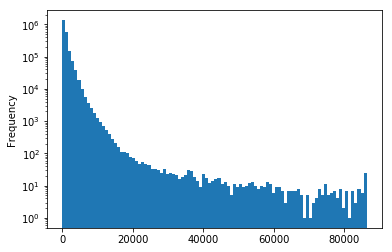

In [116]:
#long time that every incident takes
fmt ='%m/%d/%Y %I:%M:%S %p'
df.INCIDENT_CLOSE_DATETIME = pd.to_datetime(df.INCIDENT_CLOSE_DATETIME, format=fmt)
df.FIRST_ON_SCENE_DATETIME = pd.to_datetime(df.FIRST_ON_SCENE_DATETIME, format=fmt)
df['total_time'] = df.INCIDENT_CLOSE_DATETIME - df.FIRST_ON_SCENE_DATETIME
df.total_time = df.total_time.dt.seconds
df.total_time.plot(kind='hist', bins=100, logy=True)# frequency of taken time of incidents

In [90]:
#df2 = pd.get_dummies(df.INCIDENT_CLASSIFICATION_GROUP)

In [91]:
df.columns

Index(['STARFIRE_INCIDENT_ID', 'INCIDENT_DATETIME', 'ALARM_BOX_BOROUGH',
       'ALARM_BOX_NUMBER', 'ALARM_BOX_LOCATION', 'INCIDENT_BOROUGH', 'ZIPCODE',
       'POLICEPRECINCT', 'CITYCOUNCILDISTRICT', 'COMMUNITYDISTRICT',
       'COMMUNITYSCHOOLDISTRICT', 'CONGRESSIONALDISTRICT',
       'ALARM_SOURCE_DESCRIPTION_TX', 'ALARM_LEVEL_INDEX_DESCRIPTION',
       'HIGHEST_ALARM_LEVEL', 'INCIDENT_CLASSIFICATION',
       'INCIDENT_CLASSIFICATION_GROUP', 'DISPATCH_RESPONSE_SECONDS_QY',
       'FIRST_ASSIGNMENT_DATETIME', 'FIRST_ACTIVATION_DATETIME',
       'FIRST_ON_SCENE_DATETIME', 'INCIDENT_CLOSE_DATETIME',
       'VALID_DISPATCH_RSPNS_TIME_INDC', 'VALID_INCIDENT_RSPNS_TIME_INDC',
       'INCIDENT_RESPONSE_SECONDS_QY', 'INCIDENT_TRAVEL_TM_SECONDS_QY',
       'ENGINES_ASSIGNED_QUANTITY', 'LADDERS_ASSIGNED_QUANTITY',
       'OTHER_UNITS_ASSIGNED_QUANTITY', 'total_time'],
      dtype='object')

In [117]:
population_data = pd.read_csv('~/Downloads/2010+Census+Population+By+Zipcode+(ZCTA).csv',
                              index_col=0)
population_data = population_data[population_data['2010 Census Population'] != 0]

In [118]:
total_incident_per_zipcode = pd.DataFrame(df.groupby('ZIPCODE').count().STARFIRE_INCIDENT_ID)#number of incident in each zipcode
mean_time_per_zipcode = pd.DataFrame(df.groupby('ZIPCODE').total_time.mean())#average taken time for incident in each group
total_incident_per_zipcode = total_incident_per_zipcode.merge(population_data, how='left', 
                                 left_index=True, right_index=True)#merging population data set and quantity of incident in each zipcode
total_incident_per_zipcode = total_incident_per_zipcode.merge(mean_time_per_zipcode, how='left',
                                                             left_index=True, right_index=True)#merging with average taken time for incidents
total_incident_per_zipcode['ratio_per_capita'] = total_incident_per_zipcode.STARFIRE_INCIDENT_ID.divide(total_incident_per_zipcode['2010 Census Population'])#making a ration for each zipcode based on the population and the quantity of incident
total_incident_per_zipcode = total_incident_per_zipcode.rename(index=str, columns={'total_time':'mean_time_per_zipcode'})
total_incident_per_zipcode.drop(['STARFIRE_INCIDENT_ID', '2010 Census Population'], axis=1, inplace=True)
total_incident_per_zipcode.head()

,mean_time_per_zipcode,ratio_per_capita
10000.0,1099.250000,NaN
10001.0,1068.943585,0.986162
10002.0,1015.123727,0.371601
10003.0,920.096236,0.418249
10004.0,1066.426753,1.144707


In [119]:
total_incident_per_zipcode.dropna(inplace=True)
# total_incident_per_zipcode.ratio_per_capita.mean()

In [120]:
df.index = df.ZIPCODE.astype(np.float32)
total_incident_per_zipcode.index = total_incident_per_zipcode.index.astype(np.float32)
df = df.merge(total_incident_per_zipcode, right_index=True, left_index=True, how='left')

In [560]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 2220378 entries, 10000.0 to 11697.0
Data columns (total 32 columns):
STARFIRE_INCIDENT_ID              float64
INCIDENT_DATETIME                 object
ALARM_BOX_BOROUGH                 object
ALARM_BOX_NUMBER                  int64
ALARM_BOX_LOCATION                object
INCIDENT_BOROUGH                  object
ZIPCODE                           float64
POLICEPRECINCT                    float64
CITYCOUNCILDISTRICT               float64
COMMUNITYDISTRICT                 float64
COMMUNITYSCHOOLDISTRICT           float64
CONGRESSIONALDISTRICT             float64
ALARM_SOURCE_DESCRIPTION_TX       object
ALARM_LEVEL_INDEX_DESCRIPTION     object
HIGHEST_ALARM_LEVEL               object
INCIDENT_CLASSIFICATION           object
INCIDENT_CLASSIFICATION_GROUP     object
DISPATCH_RESPONSE_SECONDS_QY      int64
FIRST_ASSIGNMENT_DATETIME         object
FIRST_ACTIVATION_DATETIME         object
FIRST_ON_SCENE_DATETIME           datetime64[ns]
INCID

In [37]:
# drop missing values which is too small compare to the dataset size
df.isnull().sum()

STARFIRE_INCIDENT_ID                  0
INCIDENT_DATETIME                     0
ALARM_BOX_BOROUGH                     0
ALARM_BOX_NUMBER                      0
ALARM_BOX_LOCATION                    0
INCIDENT_BOROUGH                      0
ZIPCODE                               0
POLICEPRECINCT                        0
CITYCOUNCILDISTRICT                   0
COMMUNITYDISTRICT                     0
COMMUNITYSCHOOLDISTRICT               0
CONGRESSIONALDISTRICT                 0
ALARM_SOURCE_DESCRIPTION_TX           0
ALARM_LEVEL_INDEX_DESCRIPTION         0
HIGHEST_ALARM_LEVEL                   0
INCIDENT_CLASSIFICATION               0
INCIDENT_CLASSIFICATION_GROUP         0
DISPATCH_RESPONSE_SECONDS_QY          0
FIRST_ASSIGNMENT_DATETIME             0
FIRST_ACTIVATION_DATETIME             0
FIRST_ON_SCENE_DATETIME               0
INCIDENT_CLOSE_DATETIME               0
VALID_DISPATCH_RSPNS_TIME_INDC        0
VALID_INCIDENT_RSPNS_TIME_INDC        0
INCIDENT_RESPONSE_SECONDS_QY          0


In [121]:
df.dropna(inplace=True)

In [99]:
df.isnull().sum()

STARFIRE_INCIDENT_ID              0
INCIDENT_DATETIME                 0
ALARM_BOX_BOROUGH                 0
ALARM_BOX_NUMBER                  0
ALARM_BOX_LOCATION                0
INCIDENT_BOROUGH                  0
ZIPCODE                           0
POLICEPRECINCT                    0
CITYCOUNCILDISTRICT               0
COMMUNITYDISTRICT                 0
COMMUNITYSCHOOLDISTRICT           0
CONGRESSIONALDISTRICT             0
ALARM_SOURCE_DESCRIPTION_TX       0
ALARM_LEVEL_INDEX_DESCRIPTION     0
HIGHEST_ALARM_LEVEL               0
INCIDENT_CLASSIFICATION           0
INCIDENT_CLASSIFICATION_GROUP     0
DISPATCH_RESPONSE_SECONDS_QY      0
FIRST_ASSIGNMENT_DATETIME         0
FIRST_ACTIVATION_DATETIME         0
FIRST_ON_SCENE_DATETIME           0
INCIDENT_CLOSE_DATETIME           0
VALID_DISPATCH_RSPNS_TIME_INDC    0
VALID_INCIDENT_RSPNS_TIME_INDC    0
INCIDENT_RESPONSE_SECONDS_QY      0
INCIDENT_TRAVEL_TM_SECONDS_QY     0
ENGINES_ASSIGNED_QUANTITY         0
LADDERS_ASSIGNED_QUANTITY   

In [139]:
# Defending target variable; 1:safe, 2:unsafe
def safety_index(x):
    ans = 0
    ratio_per_capita_median = 0.00100
    if x.ratio_per_capita > ratio_per_capita_median :
        ans += 1

    if x.total_time > x.mean_time_per_zipcode:
        ans += 1

    return ans
df.dropna(inplace=True)
df['safety_index'] = df.apply(safety_index, axis=1)

In [140]:
df.safety_index.value_counts()

1    1544923
2     663274
Name: safety_index, dtype: int64

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Y = df[['safety_index']].values
X = df[['ratio_per_capita','total_time', 'INCIDENT_RESPONSE_SECONDS_QY', 'LADDERS_ASSIGNED_QUANTITY', 'ENGINES_ASSIGNED_QUANTITY']].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression(C=0.001, penalty='l2')
model.fit(X_train, y_train)


# use the model to make predictions with the test data
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

/Users/elham/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.94
[[453335  10139]
 [ 29986 169000]]
             precision    recall  f1-score   support

          1       0.94      0.98      0.96    463474
          2       0.94      0.85      0.89    198986

avg / total       0.94      0.94      0.94    662460



In [142]:
#important features after modeling by LogisticRegression
logreg = LogisticRegression(C=0.001, penalty='l2')
from sklearn.feature_selection import RFE
rfe = RFE(logreg)
fit = rfe.fit(X_train, y_train)
print("top features: %d" %(fit.n_features_))
print("selected features: %s" %(fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

/Users/elham/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


top features: 2
selected features: [False  True  True False False]
Feature Ranking: [4 1 1 2 3]
